<a href="https://colab.research.google.com/github/Mwangi-dan/Sentiment-analysis_Group-project/blob/main/Twitter_sentiment_analysis_Group6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
# path to dataset should be "drive/sentiment-analysis/"
path = "/content/drive/MyDrive/sentiment-analysis/Twitter_Sentiments.csv"

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import string
import seaborn as sns

# Load the dataset

In [15]:
df = pd.read_csv(path)
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [18]:
df.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [19]:
df.isnull().sum()

,0
id,0
label,0
tweet,0


# Preprocessing Dataset

In [34]:
# Removing patterns in the input text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

In [63]:
# Removing user handles in tweets
df['clean_tweets'] = np.vectorize(remove_pattern)(df['tweet'], '@[\w]*')

In [64]:
df.head()

,id,label,tweet,clean_tweets
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [41]:
df.tail()

,id,label,tweet,clean_tweets
31957,31958,0,ate @user isz that youuu?ðððððð...,ate isz that youuu?ððððððð...
31958,31959,0,to see nina turner on the airwaves trying to...,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...","#sikh #temple vandalised in in #calgary, #wso..."
31961,31962,0,thank you @user for you follow,thank you for you follow


In [72]:
# Removing special chars, punctuations & numbers
df['clean_tweets'] = df['clean_tweets'].str.replace("[^a-zA-Z#]", " ", regex=True)
df.head()

,id,label,tweet,clean_tweets
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide society now #motivation


In [73]:
# Removing short words from the tweets
df['clean_tweets'] = df['clean_tweets'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
df.head()

,id,label,tweet,clean_tweets
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguide society #motivation


In [74]:
# Tokenizing words
tokenized_tweet = df['clean_tweets'].apply(lambda x: x.split())
tokenized_tweet.head()

,clean_tweets
0,"[when, father, dysfunctional, selfish, drags, ..."
1,"[thanks, #lyft, credit, cause, they, offer, wh..."
2,"[bihday, your, majesty]"
3,"[#model, love, take, with, time]"
4,"[factsguide, society, #motivation]"


In [75]:
# Stemming
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda tokenized_sentence: [stemmer.stem(word) for word in tokenized_sentence])
tokenized_tweet.head()

,clean_tweets
0,"[when, father, dysfunct, selfish, drag, kid, i..."
1,"[thank, #lyft, credit, caus, they, offer, whee..."
2,"[bihday, your, majesti]"
3,"[#model, love, take, with, time]"
4,"[factsguid, societi, #motiv]"


In [76]:
# combine words to a sentence
for i in range(len(tokenized_tweet)):
  tokenized_tweet[i] = " ".join(tokenized_tweet[i])

df['clean_tweets'] = tokenized_tweet
df.head()

,id,label,tweet,clean_tweets
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,3,0,bihday your majesty,bihday your majesti
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguid societi #motiv


# Exploratory Data Analysis (EDA)

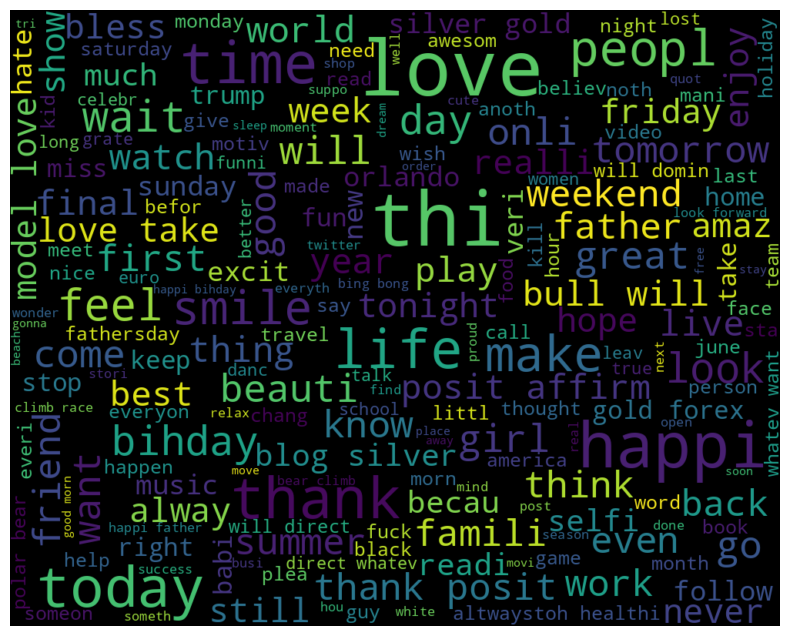

In [59]:
# Visualize frequent words
all_words = " ".join([sentence for sentence in df['clean_tweets']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=1000, height=800, random_state=42, max_font_size=100).generate(all_words)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

###Extracting data from Hashtags

In [68]:
# Functiopn to extract hashtags
def extract_hashtag(tweets):
  """
  Tweets (str): words in the tweets

  Returns:
  hashtag (string): hashtags extracted from tweet
  """
  hashtags = []
  for t in tweets:
    hashtag = re.findall("#(\w+)", t)
    hashtags.append(hashtag)
  return hashtags

In [77]:
# Extract hashtags from +ve tweets (label = 0)
pos_tweets = extract_hashtag(df['clean_tweets'][df['label']==0])

# Extract hashtags from -ve tweets (label = 1)
neg_tweets = extract_hashtag(df['clean_tweets'][df['label']==1])

In [78]:
pos_tweets[:5]

[['run'], ['lyft', 'disapoint', 'getthank'], [], ['model'], ['motiv']]

In [79]:
neg_tweets[:5]

[['cnn', 'michigan', 'tcot'],
 ['australia',
  'opkillingbay',
  'seashepherd',
  'helpcovedolphin',
  'thecov',
  'helpcovedolphin'],
 [],
 [],
 ['neverump', 'xenophobia']]

In [80]:
# unnesting the lists
pos_tweets = sum(pos_tweets, [])
neg_tweets = sum(neg_tweets, [])

In [81]:
pos_tweets[:5]

['run', 'lyft', 'disapoint', 'getthank', 'model']

In [82]:
import nltk

freq = nltk.FreqDist(pos_tweets)
d = pd.DataFrame(
    {
        'Hashtag': list(freq.keys()),
        'Count': list(freq.values())
    }
)
d.head()

,Hashtag,Count
0,run,72
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,375


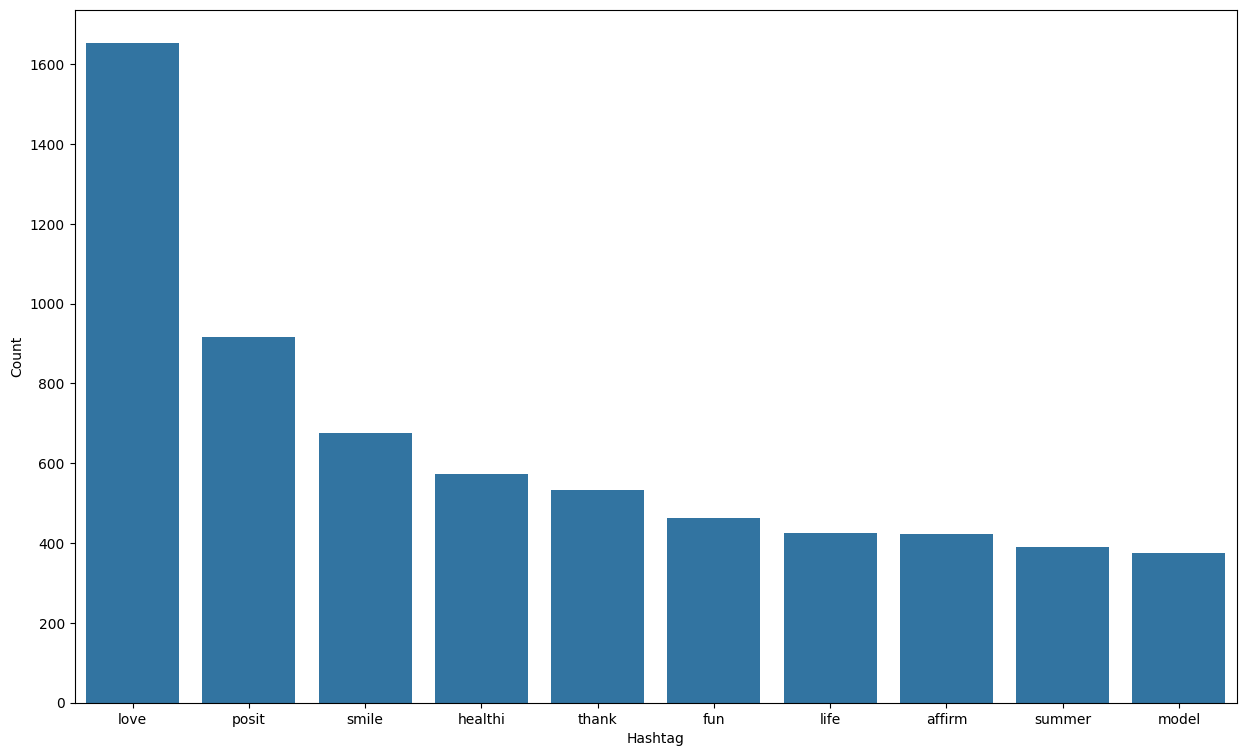

In [83]:
# select top 10 hashtags
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y="Count")
plt.show()

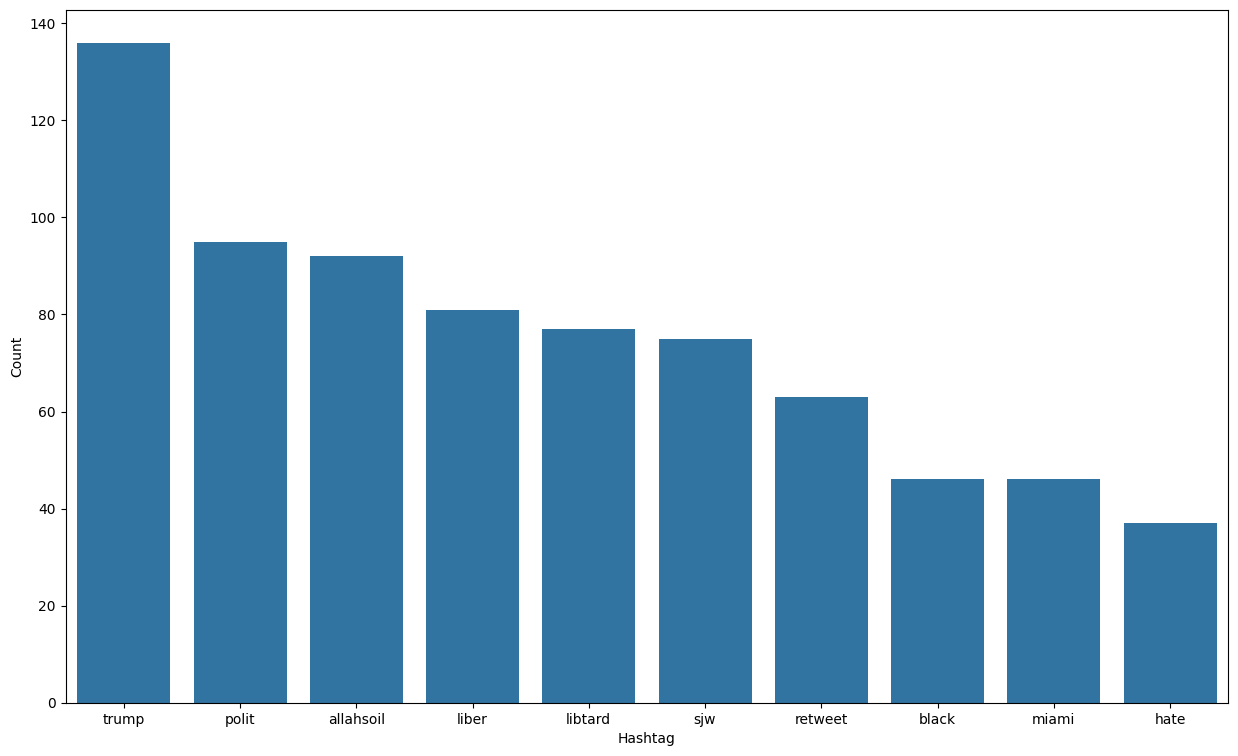

In [84]:
# Bar plot for negative tweets
freq = nltk.FreqDist(neg_tweets)
d = pd.DataFrame(
    {
        'Hashtag': list(freq.keys()),
        'Count': list(freq.values())
    }
)

d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y="Count")
plt.show()